#### Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

#### Importing Dataset

In [ ]:
from pandas import json_normalize

data = requests.get('https://data.covid19india.org/states_daily.json').json()
df = json_normalize(data['states_daily'])

In [ ]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
df.isna().any().any() # no missing values

False

In [ ]:
df.columns

Index(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dateymd', 'dd', 'dl',
       'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh',
       'ml', 'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status',
       'tg', 'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb'],
      dtype='object')

#### Data Preprocessing

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['status'] = label_encoder.fit_transform(df['status'])

###### Converting Columns from String to Int

In [ ]:
for col in df:
  df[col] = pd.to_numeric(df[col],errors='ignore')

In [ ]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
#converting date to datetimme
import datetime
df['dateymd'] = pd.to_datetime(df['dateymd'],errors = 'ignore')
# for i in df['dateymd']: print(i)


# Q1. Data Manipulation

### 1

In [ ]:
filter_by_dates = df[(df.dateymd >= datetime.datetime(2020, 3, 14)) & (df.dateymd <= datetime.datetime(2021, 8, 16))]
filter_by_dates.groupby('status').sum().tt

status
Confirmed    32249044
Deceased       432117
Recovered    31441098
Name: tt, dtype: int64

### 2

In [ ]:
states_data = filter_by_dates.groupby('status').sum()[['dl','mh','wb','tn']]
states_data.rename(columns={'dl':'Delhi','mh':'Maharashtra','wb':"West Bengal",'tn':'Tamil Nadu'})


""" dn state data is little weird. maybe because some people (18 to be exact)
got confirmed before 14 march 2020(out starting date) and recovered before 16 aug 2021
our ending date hence there is hike of 18 peoples in out data. """


# states_data = filter_by_dates.groupby('status').sum()[['dn']]
states_data

,dl,mh,wb,tn
status,,,,
Confirmed,1437118,6396805,1539065,2590632
Deceased,25069,135138,18312,34547
Recovered,1411582,6195744,1510921,2535715


### 3

In [ ]:
states = {'an':'Andaman and Nicobar Islands',
          'ap':'Andhra Pradesh',
          'ar': 'Arunachal Pradesh',
          'as':'Assam',
          'br':'Bihar',
          'ct':'Chhattisgarh',
          'dl':'Delhi',
          'dn':'Dadara & Nagar Haveli & Daman & Diu',
          'ga':'Goa',
          'gj':'Gujarat',
          'hp':'Himachal Pradesh',
          'jh':'Jharkhand',
          'jk':'Jammu And Kashmir',
          'ka':'Karnataka',
          'kl':'Kerala',
          'la':'Ladakh',
          'ld':'Lakshadweep',
          'mh':'Maharashtra',
          'mn':'Manipur',
          'mp':'Madhya Pradesh',  
          'nl':'Nagaland', 
          'or':'Odisha', 
          'pb':'Punjab', 
          'py':'Puducherry', 
          'rj':'Rajasthan', 
          'sk':'Sikkim',
          'tg':'Telangana', 
          'tn':'Tamil Nadu', 
          'tr':'Tripura', 
          'un':'States Unassigned', 
          'up':'Uttar Pradesh', 
          'ut':'Uttarakhand', 
          'wb':'West Bengal'}

33


In [ ]:
cases_by_state = filter_by_dates.groupby('status').sum()
state_data =  cases_by_state[['an','ap','ar','as','br','ct','dl','dn','ga','gj','hp','hr','jh','jk','ka', 'kl', 'la', 'ld', 'mh', 'mn', 'mp', 'nl', 'or', 'pb', 'py', 'rj', 'sk','tg', 'tn', 'tr', 'up', 'ut', 'wb']]
state_data = state_data.rename(columns=states)
state_data_transpose = state_data.T
state_data_transpose["Recovery Rate"] = 100*state_data_transpose["Recovered"]/state_data_transpose["Confirmed"]

In [ ]:
state_data_transpose.nlargest(10,'Recovery Rate').index

Index(['Dadara & Nagar Haveli & Daman & Diu', 'Rajasthan', 'Ladakh', 'Gujarat',
       'Lakshadweep', 'Madhya Pradesh', 'hr', 'Uttar Pradesh', 'Bihar',
       'Chhattisgarh'],
      dtype='object')

In [ ]:
state_data_transpose.nsmallest(10,'Recovery Rate').index

Index(['Sikkim', 'Nagaland', 'Manipur', 'Kerala', 'Arunachal Pradesh',
       'Uttarakhand', 'Maharashtra', 'Himachal Pradesh', 'Tripura', 'Punjab'],
      dtype='object')

In [ ]:
state_data_transpose

status,Confirmed,Deceased,Recovered,Recovery Rate
Andaman and Nicobar Islands,7545,129,7410,98.210736
Andhra Pradesh,1994606,13660,1963728,98.451925
Arunachal Pradesh,51514,252,49425,95.944792
Assam,580555,5507,566101,97.510313
Bihar,725497,9649,715635,98.640656
Chhattisgarh,1003814,13548,989128,98.536980
Delhi,1437118,25069,1411582,98.223110
Dadara & Nagar Haveli & Daman & Diu,10520,4,10534,100.133080
Goa,172568,3176,168519,97.653679
Gujarat,825195,10077,814935,98.756658


### 4

In [ ]:
#3 largest in terms of confirmed
state_data_transpose.nlargest(3,'Confirmed')

status,Confirmed,Deceased,Recovered,Recovery Rate
Maharashtra,6396805,135138,6195744,96.856853
Kerala,3702417,18744,3510904,94.827352
Karnataka,2930529,37014,2871449,97.983982


In [ ]:
#3 largest in terms of recovered
state_data_transpose.nlargest(3,'Recovered')

status,Confirmed,Deceased,Recovered,Recovery Rate
Maharashtra,6396805,135138,6195744,96.856853
Kerala,3702417,18744,3510904,94.827352
Karnataka,2930529,37014,2871449,97.983982


In [ ]:
#3 largest in terms of deceased
state_data_transpose.nlargest(3,'Deceased')

status,Confirmed,Deceased,Recovered,Recovery Rate
Maharashtra,6396805,135138,6195744,96.856853
Karnataka,2930529,37014,2871449,97.983982
Tamil Nadu,2590632,34547,2535715,97.880170


###5

In [ ]:
#3 lowest in terms of confirmed
state_data_transpose.nsmallest(3,'Confirmed')

status,Confirmed,Deceased,Recovered,Recovery Rate
Andaman and Nicobar Islands,7545,129,7410,98.210736
Lakshadweep,10294,51,10164,98.737128
Dadara & Nagar Haveli & Daman & Diu,10520,4,10534,100.133080


In [ ]:
#3 lowest in terms of recovered
state_data_transpose.nsmallest(3,'Recovered')

status,Confirmed,Deceased,Recovered,Recovery Rate
Andaman and Nicobar Islands,7545,129,7410,98.210736
Lakshadweep,10294,51,10164,98.737128
Dadara & Nagar Haveli & Daman & Diu,10520,4,10534,100.133080


In [ ]:
#3 lowest in terms of deceased
state_data_transpose.nsmallest(3,'Deceased')

status,Confirmed,Deceased,Recovered,Recovery Rate
Dadara & Nagar Haveli & Daman & Diu,10520,4,10534,100.133080
Lakshadweep,10294,51,10164,98.737128
Andaman and Nicobar Islands,7545,129,7410,98.210736


###6


In [ ]:
all_data = filter_by_dates.rename(columns = states)
all_data

,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,ch,Chhattisgarh,date,dateymd,dd,Delhi,Dadara & Nagar Haveli & Daman & Diu,Goa,Gujarat,Himachal Pradesh,hr,Jharkhand,Jammu And Kashmir,Karnataka,Kerala,Ladakh,Lakshadweep,Maharashtra,ml,Manipur,Madhya Pradesh,mz,Nagaland,Odisha,Punjab,Puducherry,Rajasthan,Sikkim,status,Telangana,Tamil Nadu,Tripura,tt,States Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,2,1835,255,857,38,1,114,15-Aug-21,2021-08-15,0,18,0,85,18,257,11,30,110,1611,20089,4,5,3710,278,573,20,1067,102,1043,39,85,13,213,Recovered,582,1842,253,35936,0,36,31,709
1559,0,16,0,10,0,0,1,15-Aug-21,2021-08-15,0,0,0,3,0,3,1,0,2,21,102,0,0,130,7,10,0,3,4,64,2,1,0,0,Deceased,1,23,4,421,0,1,0,12
1560,1,909,165,758,14,2,68,16-Aug-21,2021-08-16,0,27,2,62,14,276,22,35,77,1065,12294,4,6,4145,352,275,7,249,44,868,30,49,11,20,Confirmed,405,1851,52,24696,0,17,18,502
1561,0,1543,249,1014,42,3,224,16-Aug-21,2021-08-16,0,73,0,96,13,334,18,13,135,1486,18542,9,6,5811,649,546,16,954,111,1167,48,86,44,147,Recovered,577,1911,223,36871,0,36,54,691


In [ ]:
status = []
for stat in all_data['status']: status.append(stat)
date = []
for dat in all_data['dateymd']: date.append(dat)

date_with_zero_count = {}
for dat in date: 
  if(dat not in date_with_zero_count): date_with_zero_count[dat] = 0

answer = {}

for stat in states.values():
  count = []
  for i in all_data[stat]: count.append(i)

  ans = {'Confirmed':date_with_zero_count.copy(), 'Recovered': date_with_zero_count.copy(), 'Deceased': date_with_zero_count.copy()}

  for i in range(len(count)):
    ans[status[i]][date[i]] += count[i]
  
  curr_ans = {}
  for i in ans:
    temp = ans[i]
    temp = dict(sorted(temp.items(), key=lambda item: item[1]))
    new_temp = list(temp)

    curr_ans[i] = {new_temp[-1]:temp[new_temp[-1]]}
  
  answer[stat] = curr_ans

# print(answer)
new_df = pd.DataFrame.from_dict(answer)
new_df


,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Dadara & Nagar Haveli & Daman & Diu,Goa,Gujarat,Himachal Pradesh,Jharkhand,Jammu And Kashmir,Karnataka,Kerala,Ladakh,Lakshadweep,Maharashtra,Manipur,Madhya Pradesh,Nagaland,Odisha,Punjab,Puducherry,Rajasthan,Sikkim,Telangana,Tamil Nadu,Tripura,States Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
Confirmed,{2020-08-14 00:00:00: 149},{2021-05-16 00:00:00: 24171},{2021-07-12 00:00:00: 566},{2021-05-20 00:00:00: 6573},{2021-04-30 00:00:00: 15853},{2021-04-23 00:00:00: 17397},{2021-04-20 00:00:00: 28395},{2021-04-22 00:00:00: 359},{2021-05-07 00:00:00: 4195},{2021-04-30 00:00:00: 14605},{2021-05-08 00:00:00: 5424},{2021-04-28 00:00:00: 8075},{2021-05-07 00:00:00: 5443},{2021-05-05 00:00:00: 50112},{2021-05-12 00:00:00: 43529},{2021-04-17 00:00:00: 362},{2021-05-21 00:00:00: 345},{2021-04-18 00:00:00: 68631},{2021-07-21 00:00:00: 1327},{2021-04-25 00:00:00: 13601},{2021-05-13 00:00:00: 366},{2021-05-23 00:00:00: 12852},{2021-05-08 00:00:00: 9042},{2021-05-11 00:00:00: 2049},{2021-05-02 00:00:00: 18298},{2021-05-28 00:00:00: 420},{2021-05-07 00:00:00: 11451},{2021-05-21 00:00:00: 36184},{2021-05-19 00:00:00: 879},{2020-05-27 00:00:00: 1043},{2021-04-24 00:00:00: 37944},{2021-05-07 00:00:00: 9642},{2021-05-14 00:00:00: 20846}
Recovered,{2020-08-09 00:00:00: 148},{2021-05-19 00:00:00: 24819},{2021-07-23 00:00:00: 517},{2021-05-26 00:00:00: 6266},{2021-05-10 00:00:00: 15800},{2021-04-20 00:00:00: 18746},{2021-05-01 00:00:00: 27421},{2021-05-28 00:00:00: 339},{2021-05-17 00:00:00: 4008},{2021-05-14 00:00:00: 15365},{2021-05-22 00:00:00: 5021},{2021-05-12 00:00:00: 8331},{2021-05-23 00:00:00: 4956},{2021-05-22 00:00:00: 61766},{2021-05-17 00:00:00: 99651},{2020-10-09 00:00:00: 336},{2021-05-31 00:00:00: 483},{2021-05-08 00:00:00: 82266},{2021-06-25 00:00:00: 4083},{2021-05-01 00:00:00: 14562},{2021-06-09 00:00:00: 965},{2021-05-16 00:00:00: 12077},{2021-05-16 00:00:00: 9059},{2021-05-21 00:00:00: 2017},{2021-05-17 00:00:00: 29459},{2021-06-16 00:00:00: 420},{2021-05-07 00:00:00: 17183},{2021-06-04 00:00:00: 33646},{2021-05-27 00:00:00: 1066},{2021-08-16 00:00:00: 0},{2021-05-05 00:00:00: 40852},{2021-05-21 00:00:00: 8731},{2021-05-24 00:00:00: 19670}
Deceased,{2021-05-28 00:00:00: 4},{2021-05-22 00:00:00: 118},{2021-06-14 00:00:00: 6},{2021-05-25 00:00:00: 92},{2021-06-09 00:00:00: 3971},{2021-04-28 00:00:00: 279},{2021-05-03 00:00:00: 448},{2021-04-15 00:00:00: 2},{2021-06-07 00:00:00: 80},{2021-04-29 00:00:00: 180},{2021-05-18 00:00:00: 78},{2021-05-01 00:00:00: 169},{2021-05-17 00:00:00: 73},{2021-05-23 00:00:00: 624},{2021-06-06 00:00:00: 227},{2021-05-18 00:00:00: 5},{2021-06-07 00:00:00: 3},{2021-07-20 00:00:00: 3656},{2021-05-19 00:00:00: 23},{2021-07-12 00:00:00: 1481},{2021-06-02 00:00:00: 27},{2021-08-08 00:00:00: 69},{2021-05-18 00:00:00: 231},{2021-05-23 00:00:00: 34},{2021-05-11 00:00:00: 169},{2021-05-13 00:00:00: 9},{2021-05-07 00:00:00: 87},{2020-07-22 00:00:00: 518},{2021-06-10 00:00:00: 14},{2021-08-16 00:00:00: 0},{2021-05-07 00:00:00: 372},{2021-05-17 00:00:00: 223},{2021-05-20 00:00:00: 162}


###7


In [ ]:
ans = {}
curr_date = datetime.datetime(2021, 8, 15)

for stat in states.values():
  count = []
  for i in all_data[stat]: count.append(i)

  curr_ans = {"Confirmed":0,"Recovered":0,"Deceased":0}
  for i in range(len(count)):
    if(date[i] <= curr_date): curr_ans[status[i]]+= count[i]
  
  ans[stat] = {'active_cases':curr_ans['Confirmed'] - (curr_ans['Recovered'] + curr_ans['Deceased'])}

new_df = pd.DataFrame.from_dict(ans)
new_df

,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Delhi,Dadara & Nagar Haveli & Daman & Diu,Goa,Gujarat,Himachal Pradesh,Jharkhand,Jammu And Kashmir,Karnataka,Kerala,Ladakh,Lakshadweep,Maharashtra,Manipur,Madhya Pradesh,Nagaland,Odisha,Punjab,Puducherry,Rajasthan,Sikkim,Telangana,Tamil Nadu,Tripura,States Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
active_cases,5,17865,1921,9213,241,1295,513,-20,912,182,2777,187,1288,22515,179159,18,79,67689,6540,103,2029,9385,577,931,213,2487,6758,20458,1773,0,439,6428,10030


# Q2


### 1

In [ ]:
total_cases = filter_by_dates[["dateymd","status","tt"]]

In [ ]:
confirmed = total_cases.where(total_cases.status=='Confirmed').dropna().reset_index()
recovered = total_cases.where(total_cases.status=='Recovered').dropna().reset_index()
deceased = total_cases.where(total_cases.status=='Deceased').dropna().reset_index()

pd.options.mode.chained_assignment = None 
trends = confirmed[['dateymd','tt']]
trends['recovered'] = recovered['tt']
trends['deceased'] = recovered['tt']
trends.rename(columns={'tt':'confirmed'},inplace=True)

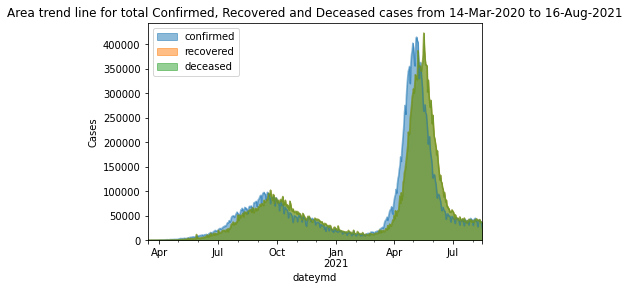

In [ ]:
trends.plot.area(x='dateymd',stacked=False)
plt.ylabel("Cases")
plt.title("Area trend line for total Confirmed, Recovered and Deceased cases from 14-Mar-2020 to 16-Aug-2021")
plt.show()

### 2

In [ ]:
total_cases_delhi = filter_by_dates[["dateymd","status","dl"]]

In [ ]:
confirmed_delhi = total_cases_delhi.where(total_cases_delhi.status=='Confirmed').dropna().reset_index()
recovered_delhi = total_cases_delhi.where(total_cases_delhi.status=='Recovered').dropna().reset_index()
deceased_delhi = total_cases_delhi.where(total_cases_delhi.status=='Deceased').dropna().reset_index()

trends_delhi = confirmed_delhi[['dateymd','dl']]
trends_delhi['recovered'] = recovered_delhi['dl']
trends_delhi['deceased'] = recovered_delhi['dl']
trends_delhi.rename(columns={'dl':'confirmed'},inplace=True)

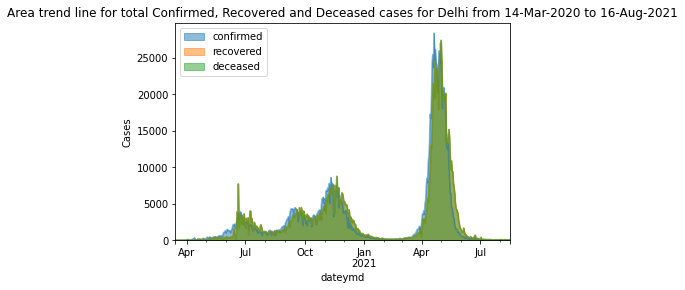

In [ ]:
trends_delhi.plot.area(x='dateymd',stacked=False)
plt.ylabel("Cases")
plt.title("Area trend line for total Confirmed, Recovered and Deceased cases for Delhi from 14-Mar-2020 to 16-Aug-2021")
plt.show()

### 3

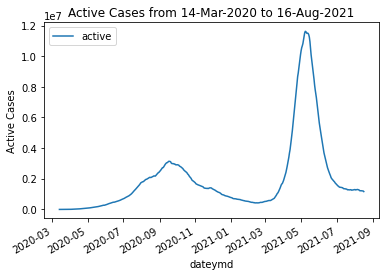

In [ ]:
date = []
for i in all_data['dateymd']: date.append(i)
tt = []
for i in all_data['tt']: tt.append(i)
status = []
for i in all_data['status']: status.append(i)

ans = {}
for i in date: 
  ans[i] = 0;

for i in range(len(date)):
  temp = tt[i]
  if(status[i] != 'Confirmed'): temp*=-1
  for j in range(i,len(date)):
    ans[date[j]] += temp

active_cases = {'dateymd':[], 'active':[]}
for i in date: 
  active_cases['dateymd'].append(i)
  active_cases['active'].append(ans[i])

active_cases = pd.DataFrame.from_dict(active_cases)
active_cases
active_cases.plot(x='dateymd',y='active')
plt.ylabel("Active Cases")
plt.title("Active Cases from 14-Mar-2020 to 16-Aug-2021")
plt.show()

### 4

Date Range: 14 March 2020-15 Aug 2021

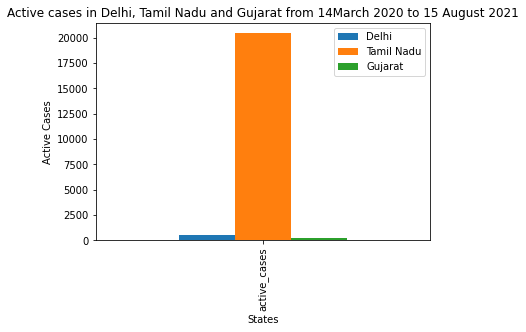

In [ ]:
active_cases_3states = new_df[["Delhi","Tamil Nadu","Gujarat"]]
active_cases_3states
active_cases_3states.plot.bar()
plt.xlabel("States")
plt.ylabel("Active Cases")
plt.title("Active cases in Delhi, Tamil Nadu and Gujarat from 14March 2020 to 15 August 2021")
plt.show()